<a href="https://colab.research.google.com/github/jeongmin5o/TimeSeries/blob/main/Manipulating_Time_Series_Data_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Timestamp 속성

- pandas는 시계열로 제공되는 금융 데이터를 분석하기 위해 개발되었음

- 데이터 프레임의 인덱스는 데이터를 시계열로 변환함
  

In [ ]:
import pandas as pd
from datetime import datetime

# 판다스 timestamp 생성
time_stamp = pd.Timestamp(datetime(2017,1,1))

# 동일한 결과값, 다른 방법
pd.Timestamp('2017-01-01') == time_stamp

True

In [ ]:
time_stamp

Timestamp('2017-01-01 00:00:00')

< Timestamp 의 속성>

1. 자동으로 시간이 '자정'으로 설정

2. 시간 엑세스 방법
  - 연도: .year
  - 요일: .day_name

3. 기간 데이터 유형
  - 항상 빈도가 존재
  - 기본적으로 '월'
  - '일일 빈도'로 전화: .asfreq('D')
  - 타임스템프 객체를 다시 기간 객체로 변환
    : .to_timestamp().to_period('M')
 
 4. Sequences of dates & times. 일련의 날짜
  - 시계열을 생성하기 위해 일련의 날짜 생서
  - pd.date_range(start= ' ', periods = 12 , freq ='M)
  - 기본값은 일일 빈도

5. pd.Datetimeindex
  - 

In [ ]:
import numpy as np

data = np.random.random((12,2))
pd.DataFrame(data=data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 320.0 bytes


In [ ]:
google=pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/google.csv')

In [ ]:
google.head(5)

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [ ]:
# datetime으로 변환

google['Date'] = pd.to_datetime(google['Date'])
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [ ]:
# 인덱스를 시간으로 설정

google.set_index('Date', inplace = True)

google.head(3)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN


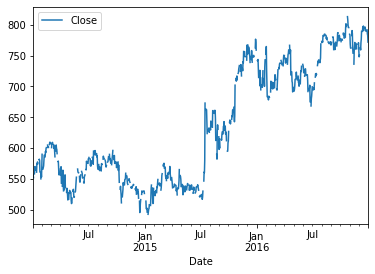

In [ ]:
google.plot()

In [ ]:
# 인덱싱 - 연도도
google['2015']   # 2015년 데이터를 전부 볼 수 있음

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """Entry point for launching an IPython kernel.


,Close
Date,
2015-01-01,NaN
2015-01-02,524.81
2015-01-03,NaN
2015-01-04,NaN
2015-01-05,513.87
...,...
2015-12-27,NaN
2015-12-28,762.51
2015-12-29,776.60


In [ ]:
# 인덱싱 - 특정 범위
google['2015-3':'2016-2']

,Close
Date,
2015-03-01,NaN
2015-03-02,571.34
2015-03-03,573.64
2015-03-04,573.37
2015-03-05,575.33
...,...
2016-02-25,705.75
2016-02-26,705.07
2016-02-27,NaN


In [ ]:
# 빈도 설정

google.asfreq('D').info()  # 원래 버전보다 빈도가 높기 때문에 누락된 값이 존재.
                          # 이를 '업샘플링'이라고 함


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


# 데이터 이동 방법법

1. 다른 시점의 값 비교 가능
2. 서로 다른 시점 값 간의 변화를 계산하는 방법
3. 성장률 계산


In [ ]:
google=pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/google.csv',
                   parse_dates=['Date'],index_col = 'Date')

In [ ]:
google.head(4)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN


## 점 이동

- default : periods = 1
- 모든 가격을 미래로 1주기 이동 
- 다른 시점의 데이터를 비교하는데 유용
- 변화율 구할 수 있음
  : 재무적 수익이라고도 하는 기간별 변화율율


In [ ]:
# 미래로 1주기 이동동
google['lagged'] = google.Close.shift()

In [ ]:
google.head(4)

,Close,lagged
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95
2014-01-05,NaN,NaN


In [ ]:
# 과거로 1주기 이동
google['shifted'] = google.Close.shift(periods = -1)

In [ ]:
google.tail(4)  # 마지막 값 누락됨 

,Close,lagged,shifted
Date,,,
2016-12-27,791.55,NaN,785.05
2016-12-28,785.05,791.55,782.79
2016-12-29,782.79,785.05,771.82
2016-12-30,771.82,782.79,NaN


In [ ]:
# 변화율

google['change'] = google.Close.div(google.shifted)
google.head(3)

,Close,lagged,shifted,change
Date,,,,
2014-01-02,556.00,NaN,551.95,1.007338
2014-01-03,551.95,556.00,NaN,NaN
2014-01-04,NaN,551.95,NaN,NaN


In [ ]:
# 백분율 구하기 : (change -1) * 100

google['retrun'] = google['change'].sub(1).mul(100)
google.head(4)

,Close,lagged,shifted,change,retrun
Date,,,,,
2014-01-02,556.00,NaN,551.95,1.007338,0.733762
2014-01-03,551.95,556.00,NaN,NaN,NaN
2014-01-04,NaN,551.95,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN


In [ ]:
# 서로 다른 시점에서 값  간의 변화 계산
# 종가의 '차이' : 주식이 거래된 마지막 날 이후의 가치 차이
# xt - (xt-1)
# 한 기간 수익률을 계산할 수 있음



google['diff'] = google.Close.diff()
google.head(4)

,Close,lagged,shifted,change,retrun,diff
Date,,,,,,
2014-01-02,556.00,NaN,551.95,1.007338,0.733762,NaN
2014-01-03,551.95,556.00,NaN,NaN,NaN,-4.05
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN


In [ ]:
# 백분율로 얻기
# (다음행 - 현재행)÷현재행 
# (xt - (xt-1) ) -xt

google['pct_change'] = google.Close.pct_change().mul(100)
google.head(4)

,Close,lagged,shifted,change,retrun,diff,pct_change
Date,,,,,,,
2014-01-02,556.00,NaN,551.95,1.007338,0.733762,NaN,NaN
2014-01-03,551.95,556.00,NaN,NaN,NaN,-4.05,-0.728417
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN,0.000000
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN,0.000000


In [ ]:
google['pct_change_3d'] = google.Close.pct_change(periods = 3).mul(100)
google.head(4)

,Close,lagged,shifted,change,retrun,diff,pct_change,pct_change_3d
Date,,,,,,,,
2014-01-02,556.00,NaN,551.95,1.007338,0.733762,NaN,NaN,NaN
2014-01-03,551.95,556.00,NaN,NaN,NaN,-4.05,-0.728417,NaN
2014-01-04,NaN,551.95,NaN,NaN,NaN,NaN,0.000000,NaN
2014-01-05,NaN,NaN,558.10,NaN,NaN,NaN,0.000000,-0.728417


# 시계열 성장률 비교

두 시계열을 비교 분석하는것은 간단한 일이 아니다. 서로 다른 수준에서 시작하기 때문이다. 

예를들어, 다양한 주식의 성과를 서로 비교 분석할때 시계열 추세를 비교하려는 경우가 많다.

이럴땐, 간편한 방법으로 모든 가격 시리즈를 정규화하여 동일한 값(100)에서 시작하도록 하는 것이다.

1.  각 시계열을 첫번째 값으로 나눈다 (정규화)

  ⇒ 첫번째 값은 1이고, 후속값은 초기 가격에 대한 상대적인 변화를 반영한다. 

2.  정규화된 계열에 100을 곱하여 초기 값에 대한 상대적인 변화를 얻는다.

  ⇒ 100에서 120으로 가격 변경 = 20퍼센트 포인트 증가를 의미

In [ ]:
import pandas as pd
google=pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/google.csv',
                   parse_dates=['Date'],index_col = 'Date')

In [ ]:
google.head(3)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN


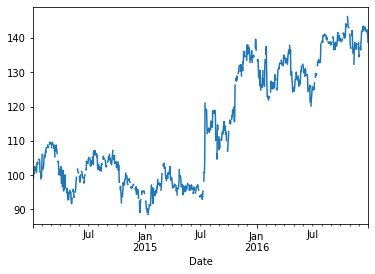

In [ ]:
# 1. 각 시계열을 첫번째 값으로 나눈다 (정규화)

# 첫번재 값 출력력
first_price  = google['Close'].iloc[0]

# 첫번재 값으로 후속값들 나눠주고 100을 곱하여 상대적인 변화 보기기
normalized = google['Close'].div(first_price).mul(100)
normalized.plot()

# 그래프 해석: google 주식이 원래 가치의 약 1.4배, 40%포인트 증가했다

In [ ]:
# 여러 주식 비교

stock = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/stocks.csv',
                    parse_dates = ['Date'], index_col = 'Date')
                    # parse_dates : 데이터로 읽어올 때 datetime 형태로 지정
                    # index_col : 인덱스로 지정할 열
stock.head(5)

,ORCL,AMGN,ABB,PG,EL,KO,ILMN,WMT,BABA,TM,T,UPS,JNJ,JPM,XOM
Date,,,,,,,,,,,,,,,
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18,64.68,42.85,69.15
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28,63.93,43.68,69.42
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85,64.45,43.92,70.02
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41,63.99,44.79,69.80
2010-01-08,30.28,56.77,133.52,4.52,24.66,174.31,33.15,25.40,27.05,59.30,27.57,60.17,64.21,44.68,69.52


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ORCL    1761 non-null   float64
 1   AMGN    1761 non-null   float64
 2   ABB     1761 non-null   float64
 3   PG      1761 non-null   float64
 4   EL      1762 non-null   float64
 5   KO      1762 non-null   float64
 6   ILMN    1761 non-null   float64
 7   WMT     1762 non-null   float64
 8   BABA    1762 non-null   float64
 9   TM      1762 non-null   float64
 10  T       1762 non-null   float64
 11  UPS     1762 non-null   float64
 12  JNJ     1762 non-null   float64
 13  JPM     1762 non-null   float64
 14  XOM     1762 non-null   float64
dtypes: float64(15)
memory usage: 220.2 KB


In [ ]:
# 정규화 시키기기
normalized = stock.div(stock.iloc[0])
normalized.head(5)

,ORCL,AMGN,ABB,PG,EL,KO,ILMN,WMT,BABA,TM,T,UPS,JNJ,JPM,XOM
Date,,,,,,,,,,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.001963,0.991337,1.005900,1.000000,0.996292,1.017680,0.993453,0.997274,1.011111,1.015527,0.999299,1.001719,0.988404,1.019370,1.003905
2010-01-06,0.985934,0.983888,0.987677,0.995604,0.999176,1.006818,1.054664,0.995327,1.010741,1.046582,0.988792,0.994328,0.996444,1.024971,1.012581
2010-01-07,0.983971,0.974879,0.970874,0.989011,1.011949,1.026520,1.072668,0.988707,0.998519,1.046761,0.971979,0.986765,0.989332,1.045274,1.009400
2010-01-08,0.990514,0.983541,0.997162,0.993407,1.016069,1.007107,1.085106,0.989097,1.001852,1.058362,0.965674,1.034204,0.992733,1.042707,1.005351


In [ ]:
# 벤치마크를 추가하여 성능비교


index = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/price.csv',
                    parse_dates = ['DATE'], index_col = 'DATE')
index.head(3)

In [ ]:
# 두 테이블 결합

prices = pd.concat ([stock, index], axis = 1).dropna()  # 시리즈가 다른 출처에서 왓으므로 dropnna 사용하여 결측값 처리
prices.head(4)

,ORCL,AMGN,ABB,PG,EL,KO,ILMN,WMT,BABA,TM,T,UPS,JNJ,JPM,XOM,SP500,Bonds,Gold,Oil
2010-01-04,30.57,57.72,133.90,4.55,24.27,173.08,30.55,25.68,27.00,56.03,28.55,58.18,64.68,42.85,69.15,1132.99,445.45,1113.00,81.52
2010-01-05,30.63,57.22,134.69,4.55,24.18,176.14,30.35,25.61,27.30,56.90,28.53,58.28,63.93,43.68,69.42,1136.52,448.15,1125.25,81.74
2010-01-06,30.14,56.79,132.25,4.53,24.25,174.26,32.22,25.56,27.29,58.64,28.23,57.85,64.45,43.92,70.02,1137.14,446.99,1125.00,83.12
2010-01-07,30.08,56.27,130.00,4.50,24.56,177.67,32.77,25.39,26.96,58.65,27.75,57.41,63.99,44.79,69.80,1141.69,446.48,1130.75,82.60


In [ ]:
# 편의를 위해 특정 열만 가져오기
prices = prices[[	'JNJ',	'JPM'	,'XOM',	'SP500']]
prices.head(3)


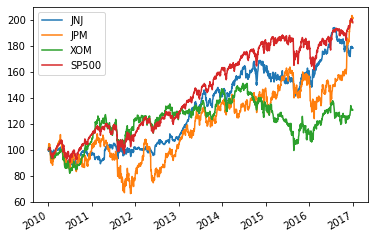

In [ ]:
# 편의를 위해 특정 열만 가져오기
# 방법 1)
prices = prices[[	'JNJ',	'JPM'	,'XOM',	'SP500']]


normalized = prices.div(prices.iloc[0]).mul(100)   # 특정 열의 리스트를 호출해서 사용해도 가능!!!
normalized.plot() 
# 그래프 해석 : S&P500에 대해 어떻게 서로 영향을 주는지 확인



# 방법 2) 
prices_1 = ['JNJ',	'JPM'	,'XOM',	'SP500']
normalized = prices[prices_1].div(prices.iloc[0]).mul(100)   # 특정 열의 리스트를 호출해서 사용해도 가능!!!
normalized.plot() 

In [ ]:
# 벤치마크(S&P500)와 비교하여 각 주식 성능 차이 비교
# 정규화된 주가 - 정규화된 S&P500


diff = normalized.sub(normalized['SP500'], axis = 0)
diff.head(5)

,JNJ,JPM,XOM,SP500
2010-01-04,0.000000,0.000000,0.000000,0.0
2010-01-05,-1.471120,1.625425,0.078891,0.0
2010-01-06,-0.721884,2.130795,0.891847,0.0
2010-01-07,-1.834670,3.759542,0.172106,0.0
2010-01-08,-1.784916,3.212450,-0.523193,0.0


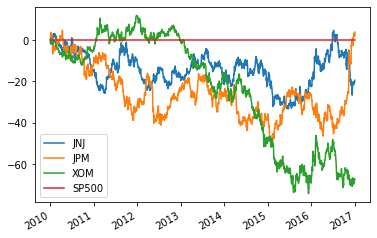

In [ ]:
diff.plot()

# 시계열의 빈도 변경 방법  

## 1. 업샘플링

In [ ]:
import pandas as pd
google=pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/google.csv',
                   parse_dates=['Date'],index_col = 'Date')

In [ ]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [ ]:
google.head(5)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [ ]:
google.asfreq('MS').head(5)

,Close
Date,
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,566.88
2014-05-01,531.35
2014-06-01,NaN


In [ ]:
google.resample('MS')  #Resampler 라는 새로운 객체반환

In [ ]:
google.resample('MS').asfreq().head(5)

,Close
Date,
2014-01-01,NaN
2014-02-01,NaN
2014-03-01,NaN
2014-04-01,566.88
2014-05-01,531.35


In [ ]:
google.asfreq('MS').equals(google.resample('MS').asfreq())

False

In [ ]:
google_1= google.resample('MS').ffill().add_suffix('_ffill')
google_1.head(5)

## 2. 다운 샘플링

In [ ]:
import pandas as pd
ozone = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/ozone_nyc.csv',
                    parse_dates = ['date'],
                    index_col = 'date')
ozone.head(5)

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


In [ ]:
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.3 KB


In [ ]:
# 1. 빈도가 없으므로, 빈도 지정
ozone = ozone.resample('D').asfreq()
ozone.head(4)

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717


In [ ]:
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   6167 non-null   float64
dtypes: float64(1)
memory usage: 98.4 KB


In [ ]:
# 2. 일일 데이터 -> 월간 빈도로 변환
# 새로운 샘플링 주기와 resample 방법 적용
# 평균 방법을 적용하여 일일 데이터를 단일 월별 값으로 집계

ozone.resample('M').mean().head()   # 월평균이 해당 워릐 마지막날에 할당됨

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [ ]:
# groupby와 유사하게 여러 집계를 한번에 적용
ozone.resample('M').agg(['mean','std']).head()

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

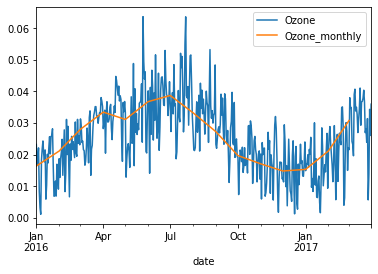

In [ ]:
# 일일 빈도로 집계 및 시각화

ozone = ozone.loc['2016':] # 자세한 내용을 보기 위해 2016년 데이터부터 표시
ax = ozone.plot()

monthly = ozone.resample('M').mean()
monthly.add_suffix('_monthly').plot(ax=ax)

# Window Function

## 1. rolling

In [ ]:
google.head(5)

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [ ]:
google.rolling(window=30).mean()

,Close
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,NaN
...,...
2016-12-26,NaN
2016-12-27,NaN
2016-12-28,NaN


In [ ]:
google.rolling(window='30D').mean()

,Close
Date,
2014-01-02,556.000000
2014-01-03,553.975000
2014-01-04,553.975000
2014-01-05,553.975000
2014-01-06,555.350000
...,...
2016-12-26,779.575500
2016-12-27,780.145714
2016-12-28,780.946190


In [ ]:
import pandas as pd

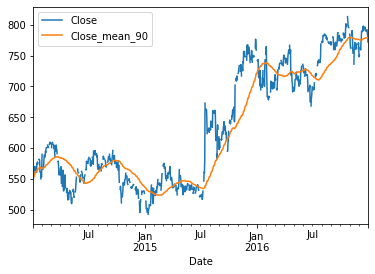

In [ ]:
r90 = google.rolling(window='90D').mean()
google.join(r90.add_suffix('_mean_90')).plot()  # concat과 유사, join을 사용하면, 수평을 따라 Series 혹은 DAtaFrame 연결 가능



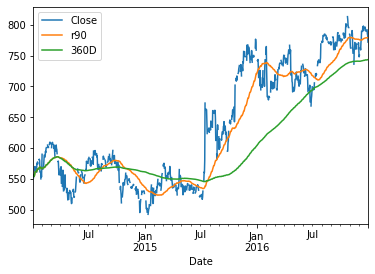

In [ ]:
google['r90'] = r90

r360 = google['Close'].rolling(window = '360D').mean()
google['360D'] = r360
google.plot() 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f29a49a7a90>,
      dtype=object)

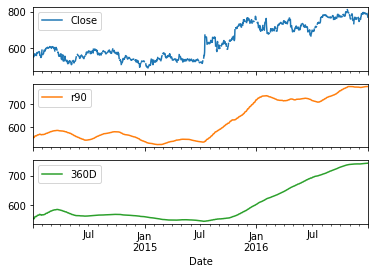

In [ ]:
google.plot(subplots = True)

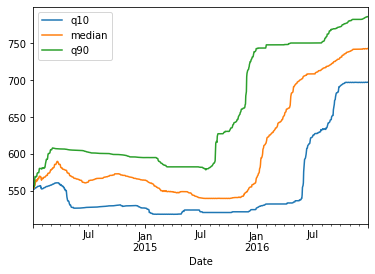

In [ ]:
rolling = google['Close'].rolling('360D')
q10 = rolling.quantile(0.1).to_frame('q10')
median = rolling.median().to_frame('median')
q90 = rolling.quantile(0.9).to_frame('q90')

pd.concat([q10, median, q90], axis = 1).plot()

In [ ]:
rolling

/usr/local/lib/python3.7/dist-packages/pandas/core/window/rolling.py:287: FutureWarning: win_type will no longer return 'freq' in a future version. Check the type of self.window instead.
  if getattr(self, attr_name, None) is not None and attr_name[0] != "_"


Rolling [window=360D,min_periods=1,center=False,win_type=freq,axis=0,method=single]

In [ ]:
rolling.quantile(0.1)

Date
2014-01-02    556.000
2014-01-03    552.355
2014-01-04    552.355
2014-01-05    552.355
2014-01-06    552.760
               ...   
2016-12-26    696.927
2016-12-27    697.068
2016-12-28    697.209
2016-12-29    697.209
2016-12-30    697.209
Name: Close, Length: 1094, dtype: float64

## 2. expanding rolling

In [ ]:
df = pd.DataFrame({'date': range(5)})

df['expanding sum'] = df.expanding().sum()
df['cumulative sum'] = df.date.cumsum()
df

,date,expanding sum,cumulative sum
0,0,0.0,0
1,1,1.0,1
2,2,3.0,3
3,3,6.0,6
4,4,10.0,10


In [ ]:
index = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/price.csv',
                    parse_dates = ['DATE'], index_col = 'DATE')
index = index[['SP500']]
index.head(3)

,SP500
DATE,
2007-06-29,1503.35
2007-07-02,1519.43
2007-07-03,1524.87


In [ ]:
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2469 entries, 2007-06-29 to 2017-06-26
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SP500   2469 non-null   float64
dtypes: float64(1)
memory usage: 38.6 KB


In [ ]:
# 수익 계산하기

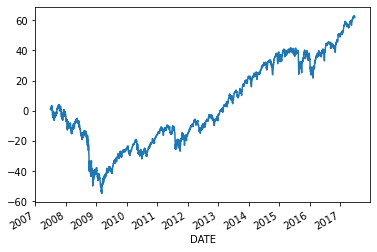

In [ ]:
# 기간 수익률

pr = index.SP500.pct_change() # 기간 수익률 계산
pr_plus_one = pr.add(1)  # 1 더하기

# 누적곱 계산하고 1 빼기
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot();

# 상승 및 하강 퍼센트 그래프

In [ ]:
index['running_min'] = index.SP500.expanding().max()
index['running_max'] = index.SP500.expanding().min()
index

,SP500,running_min,running_max
DATE,,,
2007-06-29,1503.35,1503.35,1503.35
2007-07-02,1519.43,1519.43,1503.35
2007-07-03,1524.87,1524.87,1503.35
2007-07-05,1525.40,1525.40,1503.35
2007-07-06,1530.44,1530.44,1503.35
...,...,...,...
2017-06-20,2437.03,2453.46,676.53
2017-06-21,2435.61,2453.46,676.53
2017-06-22,2434.50,2453.46,676.53


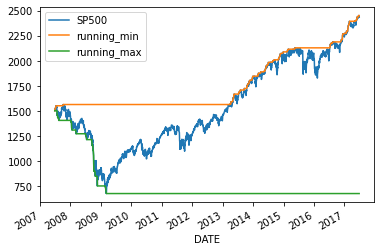

In [ ]:
index.plot()
# 각 날짜의 현재 날짜까지 최소값과 최대값을 나타냄냄

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f29a40ec550>,
      dtype=object)

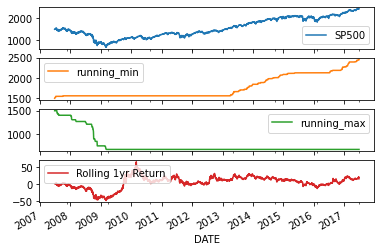

In [ ]:
# 연간 누적 수익률
import numpy as np

def  multi_period_return (period_returns ):
  return np.prod(period_returns + 1) - 1

pr = index.SP500.pct_change()
r = pr.rolling('360D').apply(multi_period_return)
index['Rolling 1yr Return'] = r.mul(100)

index.plot(subplots = True)

## 3. random walk

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


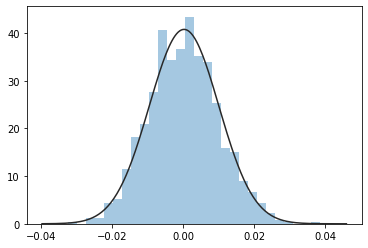

In [ ]:
from numpy.random import normal, seed
from scipy.stats import norm
import seaborn as sns

# 1000개의 무작위 생성하고, 100으로 나누어 값을 적절하게 조정
# 정규분포의 모양을 갖는 랜덤 값 생성
seed(42)
random_returns = normal(loc = 0, scale = 0.01, size = 1000)

sns.distplot(random_returns, fit = norm, kde = False)


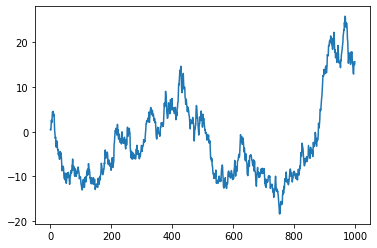

In [ ]:
return_series = pd.Series(random_returns)
random_prices = return_series.add(1).cumprod().sub(1)
random_prices.mul(100).plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


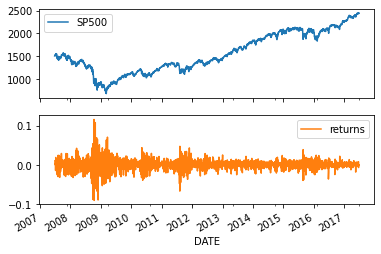

In [ ]:
data = index[['SP500']]
data['returns'] = data.SP500.pct_change() 
data.plot(subplots = True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


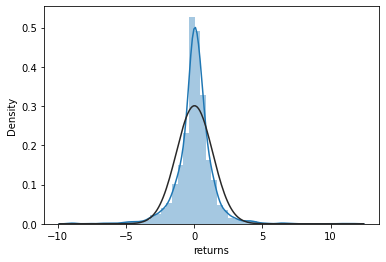

In [ ]:
sns.distplot(data.returns.dropna().mul(100), fit = norm)  
# SP500의 수익률 분포와 정규분포가 일치하지 않음
# 전형적인 발견이다
# 수익률은 정규분포가 제안하는 것 보다 더 자주 이상치를 갖는 경향이 있음


In [ ]:
from numpy.random import choice


sample = data.returns.dropna()
n_obs = data.returns.count()
random_walk = choice(sample, size = n_obs)
random_walk = pd.Series(random_walk, index = sample.index)

random_walk.head()

DATE
2007-07-02   -0.017852
2007-07-03   -0.019769
2007-07-05   -0.013852
2007-07-06    0.001196
2007-07-09    0.007319
dtype: float64

In [ ]:
start = data.SP500.first('D')

In [ ]:
sp500_random = start.append(random_walk.add(1))
sp500_random.head()

DATE
2007-06-29    1503.350000
2007-07-02       0.982148
2007-07-03       0.980231
2007-07-05       0.986148
2007-07-06       1.001196
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


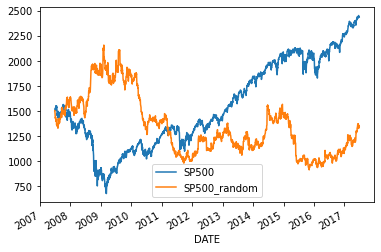

In [ ]:
data['SP500_random'] = sp500_random.cumprod()
data[['SP500','SP500_random']].plot();

## 3. 시계열 상관관계 분석

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/youssefHosni/Time-Series-With-Python/main/Time%20Series%20Manipulation/price.csv',
                    parse_dates = ['DATE'], index_col = 'DATE')

data.head(3)

,SP500,Bonds,Gold,Oil
DATE,,,,
2007-06-29,1503.35,402.15,648.50,70.47
2007-07-02,1519.43,402.96,650.50,71.11
2007-07-03,1524.87,402.02,657.25,71.41


In [ ]:
data = data.dropna()

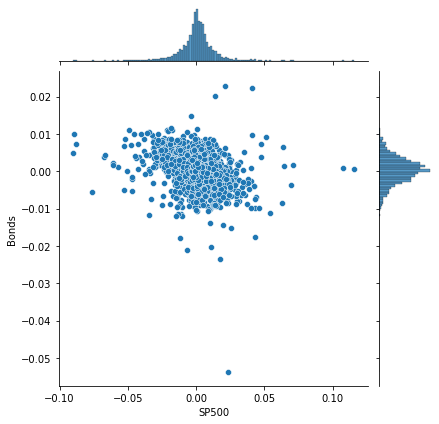

In [ ]:
d = data.pct_change()
sns.jointplot(x='SP500',y='Bonds', data = d)

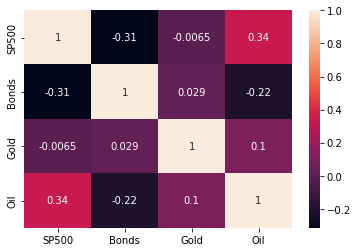

In [ ]:
cor = d.corr()

sns.heatmap(cor,annot = True )

# Case Study _ 주가분석

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive', force_remount=True)


# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/시계열')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/시계열'

In [ ]:
# nyse 증권 거래소 데이터
nyse = pd.read_excel('listings.xlsx',sheet_name = 'nyse',na_values = 'n/a')

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
nyse.info()

#  Stock Symbol : StockTicker
# Last Sale : Latest Stock Price
# IPO Year : Year of listing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stock Symbol           3147 non-null   object 
 1   Company Name           3147 non-null   object 
 2   Last Sale              3079 non-null   float64
 3   Market Capitalization  3147 non-null   float64
 4   IPO Year               1361 non-null   float64
 5   Sector                 2177 non-null   object 
 6   Industry               2177 non-null   object 
dtypes: float64(3), object(4)
memory usage: 172.2+ KB


In [ ]:
nyse

,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
Stock Symbol,,,,,,
DDD,3D Systems Corporation,14.48,1647.165276,NaN,Technology,Computer Software: Prepackaged Software
MMM,3M Company,188.65,112736.642168,NaN,Health Care,Medical/Dental Instruments
WBAI,500.com Limited,13.96,579.312876,2013.0,Consumer Services,Services-Misc. Amusement & Recreation
WUBA,58.com Inc.,36.11,5225.238185,2013.0,Technology,"Computer Software: Programming, Data Processing"
AHC,A.H. Belo Corporation,6.20,134.735089,NaN,Consumer Services,Newspapers/Magazines
...,...,...,...,...,...,...
ZBH,"Zimmer Biomet Holdings, Inc.",119.53,24052.244118,NaN,Health Care,Industrial Specialties
ZBK,Zions Bancorporation,28.86,0.000000,NaN,Finance,Major Banks
ZOES,"Zoe&#39;s Kitchen, Inc.",17.07,332.556067,2014.0,Consumer Services,Restaurants


In [ ]:
# 1. 주식 시세 표시기 (Stock Symbol)를 인덱스로 이동
nyse.set_index('Stock Symbol', inplace = True)

# 2. Sector 정보가 없는 회사는 제거
nyse.dropna(subset=['Sector'], inplace = True)   # subset: 하나 이상의 열을 식별하여 누락된 값을 필터링할 수 있음

# 번외) inplace를 하면 복사본을 만들지 않는다

#3. 시가 총액을 100만 달러로 나누어 가치를 백만 달러로 표현함
nyse['Market Capitalization']/= 1e6

In [ ]:
nyse.info(2)

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, DDD to ZTO
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2177 non-null   object 
 1   Last Sale              2175 non-null   float64
 2   Market Capitalization  2177 non-null   float64
 3   IPO Year               967 non-null    float64
 4   Sector                 2177 non-null   object 
 5   Industry               2177 non-null   object 
dtypes: float64(3), object(3)
memory usage: 119.1+ KB


In [ ]:
nyse.head(3)

In [ ]:
# 4. 각 부문에서 가장 큰 회사를 선택하기 위해 그룹화 (Sector 정보 포함)

components = nyse.groupby(['Sector'])['Market Capitalization'].nlargest(1)  # nlargest: 그룹별 가장 큰 데이터 n개에 대한 연산
components.sort_values(ascending = False)

In [ ]:
# 5. 주식 시세 표시기 포함

#  ticker: 주식시세 표시 테이프. 
tickers = components.index.get_level_values('Stock Symbol')
tickers

Index(['PG', 'TM', 'ABB', 'KO', 'WMT', 'XOM', 'JPM', 'JNJ', 'BABA', 'T',
       'ORCL', 'UPS'],
      dtype='object', name='Stock Symbol')

In [ ]:
tickers.tolist()   # 리스트 값을 목록으로 변환

['PG',
 'TM',
 'ABB',
 'KO',
 'WMT',
 'XOM',
 'JPM',
 'JNJ',
 'BABA',
 'T',
 'ORCL',
 'UPS']

In [ ]:
# 자세한 정보를 보기 위해선
columns = ['Company Name','Market Capitalization','Last Sale']
component_info = nyse.loc[tickers, columns]    # 테이블.loc[열이름, 행이름]  -> 데이터가 그에 맞게 슬라이싱 됨
# pd.options.display.float_format = '{:, .2f}'.format   # 소수점이학 2개만 표시, 천단위 기호 사용

component_info